<a href="https://colab.research.google.com/github/veritaem/veritaem.github.io/blob/master/project1/Project_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
df538['enddate'] = pd.to_datetime(df538['enddate'])
df538['startdate'] = pd.to_datetime(df538['startdate'])

In [0]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
ct538 = pd.crosstab(df538['adjusted_approve'], df538['adjusted_disapprove'])

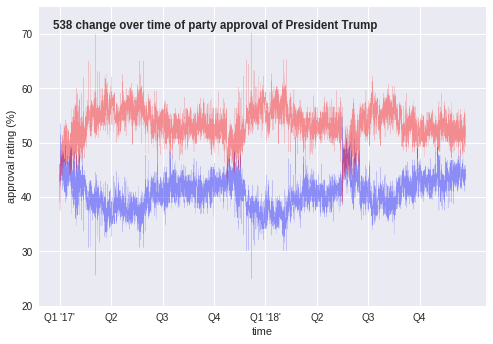

In [9]:
fig, ax = plt.subplots()

ax.set_ylim([20,75])
ax.plot(df538['adjusted_approve'], 'b', df538['adjusted_disapprove'], 'r', linewidth = .225, alpha = .4)
ax.text(x = -99, y = 71, s = '538 change over time of party approval of President Trump', fontweight = 'bold',
       fontsize = 11.5)
plt.ylabel('approval rating (%)')
plt.xlabel('time')
ax.set(xticks = range(1, 6000, 800))
ax.set(xticklabels = ("Q1 '17'", 'Q2', 'Q3', 'Q4', "Q1 '18'", 'Q2', 'Q3', 'Q4'));


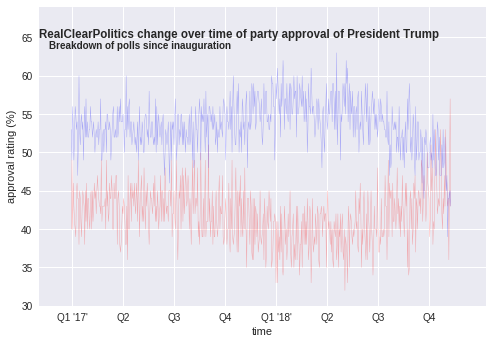

In [10]:
fig, ax = plt.subplots()

ax.set_xlim([-50, 650])
ax.set_ylim([30,69])

disapprove = ax.plot(dfRCP['Approve'], 'r', linewidth = .425, alpha = .3)
approve = ax.plot(dfRCP['Disapprove'], 'b', linewidth = .425, alpha = .3)
ax.text(x = -50, y = 65, s = 'RealClearPolitics change over time of party approval of President Trump', fontweight = 'bold',
       fontsize = 11.5)
ax.text(x = -35, y = 63.5, s = 'Breakdown of polls since inauguration', fontweight = 'bold', fontsize = 9.9)


plt.ylabel('approval rating (%)')
plt.xlabel('time')
ax.set(xticks = range(1, 600, 80))
ax.set(xticklabels = ("Q1 '17'", 'Q2', 'Q3', 'Q4', "Q1 '18'", 'Q2', 'Q3', 'Q4'))
plt.show();

#Importing The Data 

<br>

_Sources used: 538, Rassmussen, Economist, RealClearPolitics_




In [2]:
!pip install tabula_py

    100% |████████████████████████████████| 20.4MB 1.6MB/s 


In [3]:
!pip install PyPDF2

    100% |████████████████████████████████| 81kB 2.6MB/s 
  Running setup.py bdist_wheel for PyPDF2 ... - done
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabula import read_pdf
import PyPDF2
import datetime
import altair as alt

In [28]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF RCP DTPR16-18 - Sheet1.csv to DF RCP DTPR16-18 - Sheet1.csv
User uploaded file "DF RCP DTPR16-18 - Sheet1.csv" with length 25664 bytes


In [0]:
dfRCP = pd.read_csv('DF RCP DTPR16-18 - Sheet1.csv')
dfRCP.columns = ['Poll Source', 'Coverage', 'Sample', 'Approve', 'Disapprove', 'Spread']

In [6]:

!apt install openjdk-11-jre #installing java for my pdf to csv machine


Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jre is already the newest version (10.0.2+13-1ubuntu0.18.04.4).
openjdk-11-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
fivethirtyeightdata = 'https://raw.githubusercontent.com/veritaem/veritaem.github.io/master/projectcsvs/polllistcsv' #data from 538's raw on pres approval
rassmussendata = 'Rassmussen Report - Sheet1.csv' #custom document I made in sheets from rassmusssen website
df538 = pd.read_csv(fivethirtyeightdata)
dfras = pd.read_csv(rassmussendata)

In [0]:

PDF_2 = 'econTabReport.pdf'

pfr1 = PyPDF2.PdfFileReader(open(PDF_2, "rb"))


In [0]:
pg167 = pfr1.getPage(166) #getting the necessary pages out of the larger poll data
pg168 = pfr1.getPage(167)

writer = PyPDF2.PdfFileWriter() #creating my custom filewriter object

writer.addPage(pg167)
writer.addPage(pg168)


In [0]:
NewPDFfilename = "EconTables.pdf" #writing my data to a new PDF that I can then turn into useable data!  Woo
with open(NewPDFfilename, "wb") as outputStream: 
	writer.write(outputStream)

In [0]:
dfecon = pd.read_csv('EconTablescsv.csv')
